# Задание
* Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
* Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
* Создайте DataFrame в котором будут даты публикации вакансий, названия, описания,  только добавьте поле ключевые навыки
* Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
* Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
* Найдите вакансии с использованием python, которые вам интересны
* Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
* Постройте график наиболее востребованных навыков

In [173]:
import requests
from tqdm.auto import tqdm
import time
import pandas as pd
from collections import Counter

In [174]:
# Cкачайте все вакансии СБЕРа из api hh.ru (https://github.com/hhru/api у апи есть ограничение в 2000, подумайте как его обойти)
# как обойти ограничение в 2000 я не нашел (только, наверное, вариант с определяем диапазона дат поиска), это очень жесткое ограничение. Даже без api на сайте hh.ru при вводе в поиске "сбер" выводит, что найдено 2727 вакансий.
# Сколько всего вакансий от СБЕРа на hh.ru можно узнать из параметра "found" из запроса "https://api.hh.ru/vacancies?employer_id=3529".
sber = '3529'
res = requests.get(f'https://api.hh.ru/vacancies?employer_id={sber}').json()
num_per_page = res.get('per_page')
all_vacancy_ids= []
for i in tqdm(range(res.get('pages'))):
    url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={i}&per_page={num_per_page}'
    res = requests.get(url)
    vacancies = res.json()
    vacancy_ids = [el.get('id') for el in vacancies.get('items')]
    all_vacancy_ids.extend(vacancy_ids)
len(all_vacancy_ids)

  0%|          | 0/100 [00:00<?, ?it/s]

2000

In [ ]:
# vac_id = 77486113
# url = f'https://api.hh.ru/vacancies/{vac_id}'
# res = requests.get(url)
# vacancy = res.json()
# print(vacancy)

In [175]:
# Извлеките все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
all_vacancy = []
for j in tqdm(range(len(all_vacancy_ids))):
    url = f'https://api.hh.ru/vacancies/{all_vacancy_ids[j]}'
    res = requests.get(url)
    vacancy = res.json()
    dict_one = {'id': vacancy['id'], 'published_at': vacancy['published_at'], 'name': vacancy['name'], 'description': vacancy['description'], 'key_skills': vacancy['key_skills']}
    all_vacancy.append(dict_one)
    if j !=0 and j % 100 == 0:
      time.sleep(5)

  0%|          | 0/2000 [00:00<?, ?it/s]

2000


In [177]:
print(f"Всего вакансий: {len(all_vacancy)}")

Всего вакансий: 2000


In [178]:
# Создайте DataFrame в котором будут даты публикации вакансий, названия, описания, только добавьте поле ключевые навыки
df = pd.DataFrame(all_vacancy)

In [ ]:
df.head()

In [181]:
# Переведите даты публикаций в формат datetime и постройте график опубликованных вакансий по датам
df.published_at = pd.to_datetime(df.published_at).dt.floor('D')
vacs = df.groupby('published_at')['id'].count().sort_values(ascending=True)

<Axes: ylabel='published_at'>

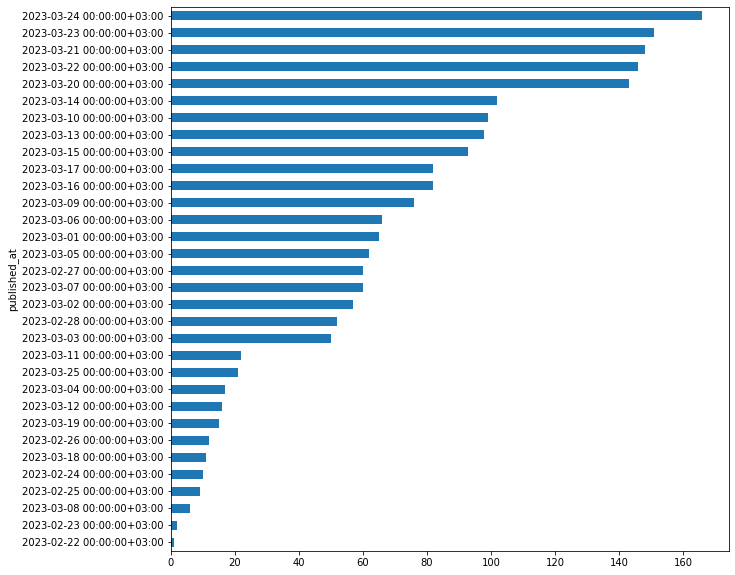

In [184]:
# построим график
vacs.plot(kind = 'barh', figsize=( 10, 10 ))

In [185]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
def get_weekday(x):
    return x.weekday()
df["weekday"] = df.published_at.apply(lambda x: get_weekday(x))
max_count_week_day = df.groupby('weekday')['id'].count().sort_values(ascending=False).idxmax()
list_weekday = ['понедельник', 'вторник', 'среда', 'четверг', 'пятница', 'суббота', 'воскресенье']
print(f"День недели, в который больше всего публикуют вакансий: {list_weekday[max_count_week_day]}")

День недели, в который больше всего публикуют вакансий: пятница


In [186]:
# Найдите вакансии с использованием python, которые вам интересны
# создаем функцию для перевода словаря с ключевыми навыками в строку с ключевыми навыками, перечисленными через запятую
def get_key_skills_to_string(x):
    string_key_skills= ''
    for i in x:
        string_key_skills = i['name'].lower() + ', ' + string_key_skills
    return string_key_skills[:-2]
# применим созданную выше функцию к нашему датафрейму. При этом создадим новую колонку key_skills_string с ключевыми навыками, перечисленными через запятую
df["key_skills_string"] = df.key_skills.apply(lambda x: get_key_skills_to_string(x))

In [187]:
# мне интересны все вакансии, в которых указан python. Поэтому выведу все вакансии, в которых слово python встречается в описании или в ключевых навыках
df[df['description'].str.contains('python') | df['key_skills_string'].str.contains('python')]

,id,published_at,name,description,key_skills,weekday,key_skills_string
9,78155339,2023-03-16 00:00:00+03:00,Стажер Data Engineer,<p>Блок &quot;Сеть продаж&quot; курирует все ф...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",3,"ms powerpoint, sql, python"
55,78462192,2023-03-23 00:00:00+03:00,Техлид команды Портала облачной инфраструктуры,<p>Облачная платформа SberInfra.Cloud является...,"[{'name': 'Python'}, {'name': 'Kubernetes'}, {...",3,"victoriametrics, ruby, golang, elk, управление..."
78,76495730,2023-03-23 00:00:00+03:00,Аналитик данных,<p>Наша команда занимается развитием не goal-o...,"[{'name': 'Python'}, {'name': 'MS SQL'}]",3,"ms sql, python"
124,78425859,2023-03-22 00:00:00+03:00,Junior Data Scientist,<p> </p> <p><strong>Обязанности:</strong></p> ...,"[{'name': 'Python'}, {'name': 'SQL'}]",2,"sql, python"
125,78460878,2023-03-23 00:00:00+03:00,Системный аналитик (junior),<p><strong>Описание:</strong></p> <p>В команду...,[],3,
142,78415684,2023-03-22 00:00:00+03:00,Продуктовый аналитик,<p><strong>Цель нашего проекта</strong> – оциф...,"[{'name': 'SQL'}, {'name': 'Python'}]",2,"python, sql"
182,78097813,2023-03-15 00:00:00+03:00,Стажер Sber AI Lab,<p>Лаборатория искусственного интеллекта специ...,[],2,
185,78467089,2023-03-23 00:00:00+03:00,Support-инженер (Junior),<p> </p> <p><strong>Основные функции и задачи:...,[],3,
232,78147020,2023-03-16 00:00:00+03:00,Python разработчик,<p>Приглашаем принять участие в конкурсе на ва...,[],3,
323,74267349,2023-02-27 00:00:00+03:00,Middle/Senior Data Engineer (SberDevices),<p><strong>SberDevices</strong> - новое направ...,"[{'name': 'Python'}, {'name': 'Big Data'}, {'n...",0,"sql, big data, python"


In [188]:
# удаляю из датафрейма колонку key_skills_string
del df['key_skills_string']

In [189]:
# Определите по полю с ключевыми навыками, какие навыки больше всего востребованы для найденных вакансий
# создаем функцию для перевода словаря с ключевыми навыками в список с ключевыми навыками, перечисленными через запятую
def get_key_skills_to_list(x):
    list_key_skills= []
    for i in x:
        list_key_skills.append(i['name'].lower())
    return list_key_skills

# применим созданную выше функцию к нашему датафрейму. При этом создадим новую колонку key_skills_list, в которой ключевые навыки будут представлены в виде списка
df["key_skills_list"] = df.key_skills.apply(lambda x: get_key_skills_to_list(x))

In [190]:
# создадим один большой список со всеми навыками
all_key_skills = []
for q in df.key_skills_list:
  for w in q:
    all_key_skills.append(w)

In [191]:
# превратим список со всеми навыками в коллекцию типа counter
counter_all_key_skills = Counter(all_key_skills)

In [192]:
# создадим из коллекции counter датафрейм
df_all_key_skills = pd.DataFrame.from_dict(counter_all_key_skills, orient='index').reset_index()
df_all_key_skills = df_all_key_skills.rename(columns={'index':'key_skills', 0:'quantity'}).sort_values(by='quantity', ascending=False)

<Axes: ylabel='key_skills'>

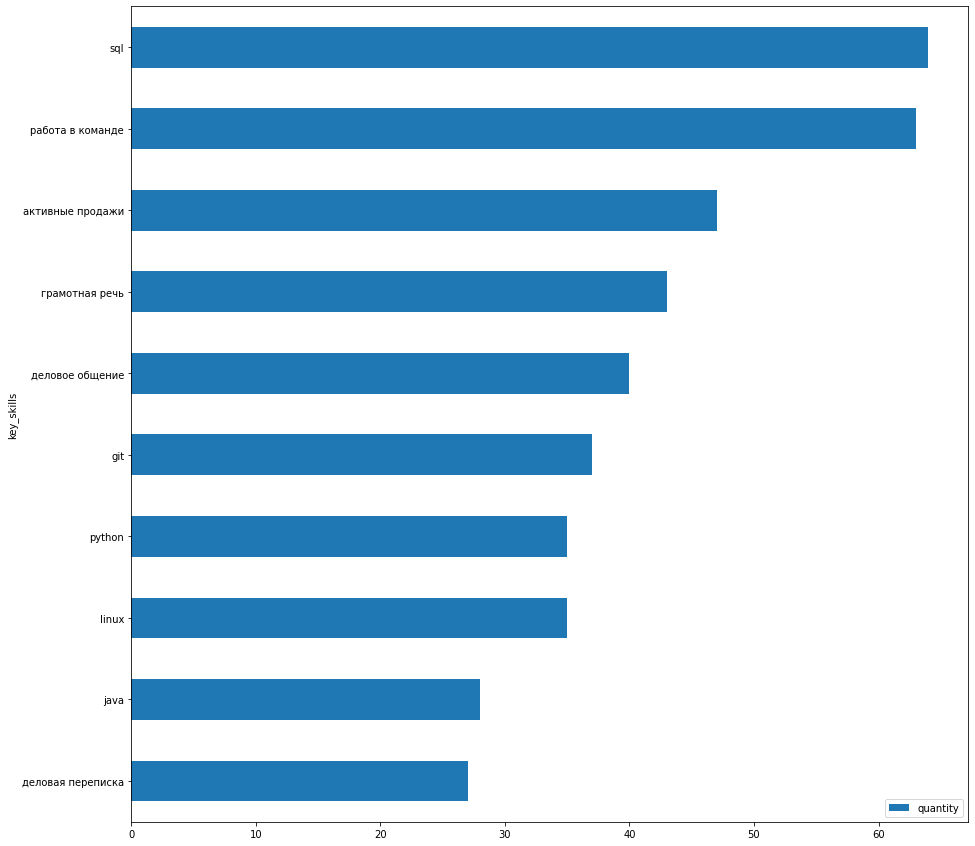

In [193]:
# Постройте график наиболее востребованных навыков
# построим график десяти наиболее востребованных ключевых навыков
df_all_key_skills.nlargest(10, 'quantity').sort_values(by='quantity', ascending=True).plot(x = "key_skills", y = "quantity", kind = 'barh', figsize=( 15 , 15 ))